# Прогнозирование температуры звезды

## Постановка задачи

Задача от обсерватории «Небо на ладони»: придумать, как с помощью нейросети определять температуру на поверхности обнаруженных звёзд. Обычно для расчёта температуры учёные пользуются следующими методами:
- Закон смещения Вина.
- Закон Стефана-Больцмана.
- Спектральный анализ.

Каждый из них имеет плюсы и минусы. Обсерватория хочет внедрить технологии машинного обучения для предсказания температуры звёзд, надеясь, что этот метод будет наиболее точным и удобным.
В базе обсерватории есть характеристики уже изученных 240 звёзд.

<b>Характеристики</b>

- Относительная светимость L/Lo — светимость звезды относительно Солнца.
- Относительный радиус R/Ro — радиус звезды относительно радиуса Солнца.
- Абсолютная звёздная величина Mv — физическая величина, характеризующая блеск звезды.
- Звёздный цвет (white, red, blue, yellow, yellow-orange и др.) — цвет звезды, который определяют на основе спектрального анализа.
- Тип звезды.

| Тип звезды                         | Номер, соответствующий типу | 
| :----------------------------------|:---------------------------:|
| Коричневый карлик                  | 0  |
| Красный карлик                     | 1  |
| Белый карлик                       | 2  | 
| Звёзды главной последовательности	 | 3  | 
| Сверхгигант                        | 4  |
| Гипергигант                        | 5  |

- Абсолютная температура T(K) — температура на поверхности звезды в Кельвинах.

## Описание хода работы

Шаг 1. Загрузить исходных данных

Шаг 2. Выполнить исследовательский анализ

- Провести исследовательский анализ:
    - количественных данных,
    - категориальных данных.
    
Обязательно использовать графический анализ и сделайте вывод.

Шаг 3. Подготовить данные к построению модели

- По результату исследовательского анализа внести корректировки, если они нужны. Сделать вывод.
- Если необходимо, категоризировать исходные данные.
- Подготовить обучающую и тестовую выборки.
- Провести масштабирование количественных данных.

Шаг 4. Построить простой модели нейронной сети — baseline

- Создать класс для задания архитектуры нейронной сети.
- Выбрать количество скрытых слоёв, количество нейронов на них, функции активации на скрытых и выходном слоях. Попробовать и сравните несколько подобных комбинаций.
- Провести обучение нейронной сети:
- Создать функцию для обучения нейронной сети.
- Провести обучение модели.
- Построить график «Факт — Прогноз», где по горизонтальной оси будут отложены условные номера звёзд, а по вертикальной — температура в Кельвинах.
- Сделать вывод.

Шаг 5. Улучшить нейросеть

- Создать решение с перебором параметров нейросети. Список параметров для перебора должен включать как минимум «dropout» и «размер батча». Архитектуру нейронной сети: количество слоёв, нейронов, вид функции активации — оставить как в Baseline, чтобы сравнить результат.
- Провести обучение нейронной сети. Вывести метрику RMSE и график «Факт — прогноз». Метрика RMSE не должна превышать 4500.
- Сделать вывод. Желательно оформить его в виде таблицы или графика.

Шаг 6. Выводы по проекту

- Кратко описать результаты каждого типа модели.
- Написать выводы сравнения двух моделей.

## Настройки рабочей тетради

In [1]:
!pip install skorch

In [2]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt

import random
import numpy as np
import torch
import torch.nn as nn
from math import ceil
from math import sqrt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.optimize import minimize
import itertools
from torch.optim import Adam
from tqdm import tqdm

from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from math import sqrt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.compose import ColumnTransformer
from skorch.callbacks import EpochScoring, EarlyStopping
from skorch.regressor import NeuralNetRegressor
from skorch.dataset import ValidSplit
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV

import os

In [3]:
# Настройки библиотек

pd.options.mode.chained_assignment = None  # default='warn'
 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [4]:
# Путь к директории с данными

path = '/datasets/'

## Загрузка данных

In [5]:
data = pd.read_csv(os.path.join(path, '6_class.csv'))

display(data)
data.info()

,Unnamed: 0,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,0,3068,0.002400,0.1700,16.12,0,Red
1,1,3042,0.000500,0.1542,16.60,0,Red
2,2,2600,0.000300,0.1020,18.70,0,Red
3,3,2800,0.000200,0.1600,16.65,0,Red
4,4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...,...
235,235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,237,8829,537493.000000,1423.0000,-10.73,5,White
238,238,9235,404940.000000,1112.0000,-11.23,5,White


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              240 non-null    int64  
 1   Temperature (K)         240 non-null    int64  
 2   Luminosity(L/Lo)        240 non-null    float64
 3   Radius(R/Ro)            240 non-null    float64
 4   Absolute magnitude(Mv)  240 non-null    float64
 5   Star type               240 non-null    int64  
 6   Star color              240 non-null    object 
dtypes: float64(3), int64(3), object(1)
memory usage: 13.2+ KB


Удалим второй столбец с индексами и переименуем столбцы для более удобного дальнейшего использования.

In [6]:
data = data.drop('Unnamed: 0', axis=1)

data.columns = ['temperature', 'luminosity', 'radius', 'abs_magnitude', 'type', 'color']

display(data)

,temperature,luminosity,radius,abs_magnitude,type,color
0,3068,0.002400,0.1700,16.12,0,Red
1,3042,0.000500,0.1542,16.60,0,Red
2,2600,0.000300,0.1020,18.70,0,Red
3,2800,0.000200,0.1600,16.65,0,Red
4,1939,0.000138,0.1030,20.06,0,Red
...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue
236,30839,834042.000000,1194.0000,-10.63,5,Blue
237,8829,537493.000000,1423.0000,-10.73,5,White
238,9235,404940.000000,1112.0000,-11.23,5,White


## Предобработка и анализ данных

### Анализ и предобработка признаков

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   temperature    240 non-null    int64  
 1   luminosity     240 non-null    float64
 2   radius         240 non-null    float64
 3   abs_magnitude  240 non-null    float64
 4   type           240 non-null    int64  
 5   color          240 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 11.4+ KB


In [8]:
print('Количество дубликатов в данных:', data.duplicated().sum())

Количество дубликатов в данных: 0


In [9]:
def col_desc(column):
    '''Функция для получения статистического описания признака'''
    print('Описание признака:')
    display(data[column].describe())
    print('-----------------------------------------------------------')
    print('Уникальные значения:')
    display(data[column].value_counts())
    print('-----------------------------------------------------------')
    print('Количество пропусков:', data[column].isna().sum())
    print('-----------------------------------------------------------')

#### Признак temperature

In [10]:
col_desc('temperature')

Описание признака:


count      240.000000
mean     10497.462500
std       9552.425037
min       1939.000000
25%       3344.250000
50%       5776.000000
75%      15055.500000
max      40000.000000
Name: temperature, dtype: float64

-----------------------------------------------------------
Уникальные значения:


3600     3
3324     2
2935     2
3450     2
2650     2
        ..
3257     1
12990    1
4287     1
6850     1
3068     1
Name: temperature, Length: 228, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


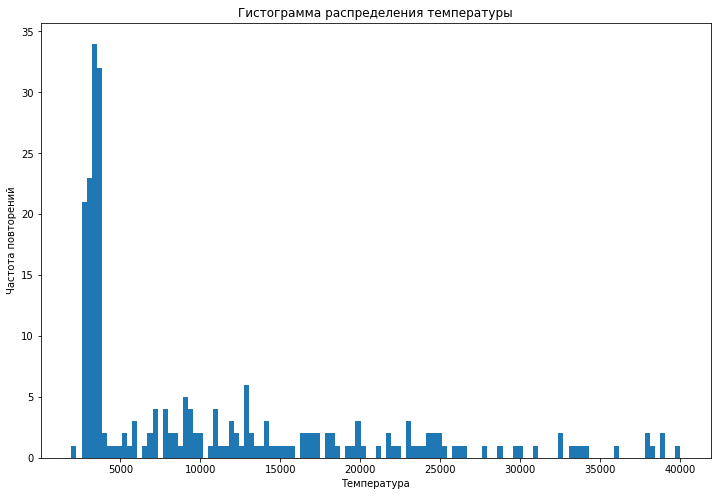

In [11]:
plt.figure(figsize=(12, 8))
plt.hist(data['temperature'], bins=120)
plt.gca().set(title='Гистограмма распределения температуры', ylabel='Частота повторений', xlabel='Температура')
plt.show()

<b>Вывод</b>

Гистограмма сильно скошена влево - имеет довольно длинный хвост справа, однако значения на правом конце гистограммы нельзя назвать аномалиями или выбросами, т.к. 40000К - допустимая величина для температуры звезд определенного класса (W), который был добавлен не так давно. Тогда вполне логично предположить, что такие значения имеют место быть, просто встречаются реже, однако нельзя их убирать, т.к. они несут информацию об отдельном классе звёзд, а значит их удаление приведёт к удалению целого класса звёзд из данных, что явно плохо скажется на обучении.

Пропусков нет, аномалий нет. Признак не нуждается в предобработке.

#### Признак luminosity

In [12]:
col_desc('luminosity')

Описание признака:


count       240.000000
mean     107188.361635
std      179432.244940
min           0.000080
25%           0.000865
50%           0.070500
75%      198050.000000
max      849420.000000
Name: luminosity, dtype: float64

-----------------------------------------------------------
Уникальные значения:


200000.000000    5
0.000980         3
0.000670         3
0.000140         3
0.000150         2
                ..
0.000621         1
14520.000000     1
537430.000000    1
120000.000000    1
9.250000         1
Name: luminosity, Length: 208, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


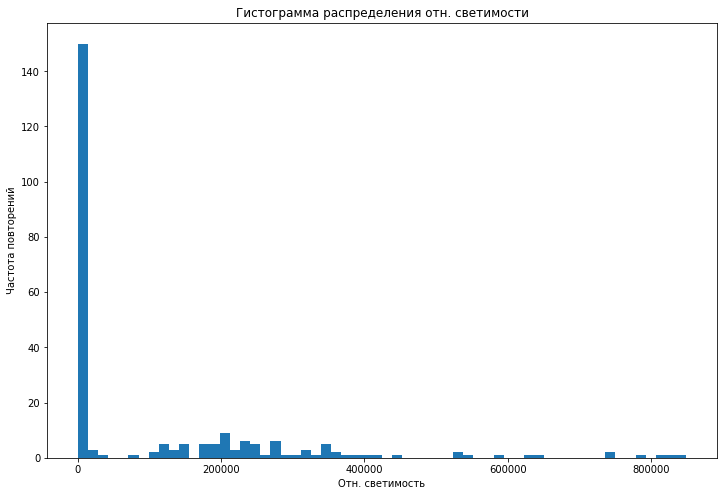

In [13]:
plt.figure(figsize=(12, 8))
plt.hist(data['luminosity'], bins=60)
plt.gca().set(title='Гистограмма распределения отн. светимости', ylabel='Частота повторений', xlabel='Отн. светимость')
plt.show()

<b>Вывод</b>

Ситуация похожа на ситуацию с температурой: гистограмма сильно скошена влево, сильное скопление у нуля, однако все эти значения также возможны в масштабах звёзд, а значит нельзя их удалять, т.к. можем потерять целый сегмент звёзд.

Пропусков нет, признак в предобработке не нуждается.

#### Признак radius

In [14]:
col_desc('radius')

Описание признака:


count     240.000000
mean      237.157781
std       517.155763
min         0.008400
25%         0.102750
50%         0.762500
75%        42.750000
max      1948.500000
Name: radius, dtype: float64

-----------------------------------------------------------
Уникальные значения:


1324.0000    3
0.2400       3
0.1100       3
36.0000      3
57.0000      2
            ..
6.7800       1
86.0000      1
0.0112       1
1679.0000    1
0.3761       1
Name: radius, Length: 216, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


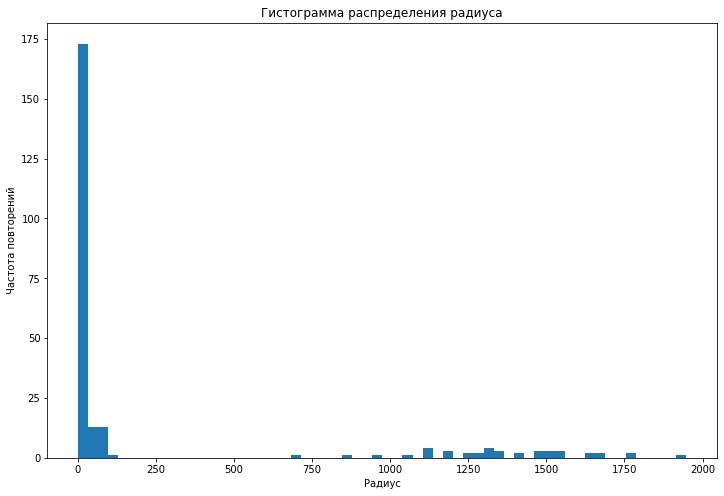

In [15]:
plt.figure(figsize=(12, 8))
plt.hist(data['radius'], bins=60)
plt.gca().set(title='Гистограмма распределения радиуса', ylabel='Частота повторений', xlabel='Радиус')
plt.show()

<b>Вывод</b>

Аналогичная ситуация: данные физически возможны, т.к. существуют как нейтронные звёзды и белые карлики с очень малым радиусом, так и гипергигант с радиусом в 1-2 тысячи раз больше солнца.

Признак не нуждается в предобработке.

#### Признак abs_magnitude

In [16]:
col_desc('abs_magnitude')

Описание признака:


count    240.000000
mean       4.382396
std       10.532512
min      -11.920000
25%       -6.232500
50%        8.313000
75%       13.697500
max       20.060000
Name: abs_magnitude, dtype: float64

-----------------------------------------------------------
Уникальные значения:


 12.230    3
 14.230    2
-7.220     2
-10.700    2
 12.780    2
          ..
 20.020    1
 12.970    1
-7.262     1
-7.450     1
-5.920     1
Name: abs_magnitude, Length: 228, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


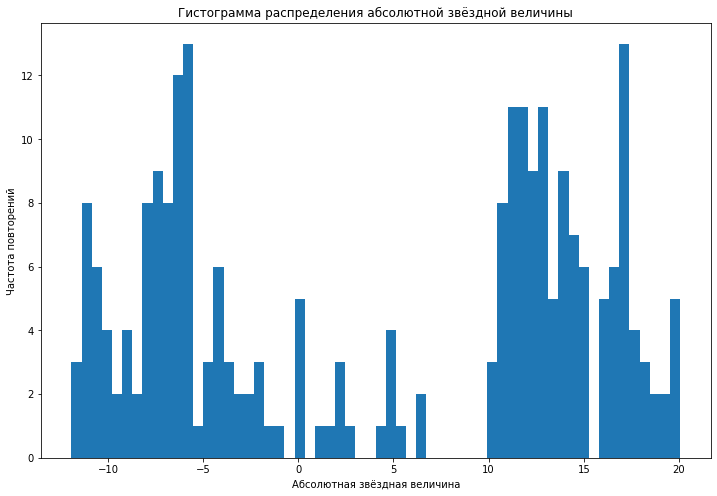

In [17]:
plt.figure(figsize=(12, 8))
plt.hist(data['abs_magnitude'], bins=60)
plt.gca().set(title='Гистограмма распределения абсолютной звёздной величины', ylabel='Частота повторений', xlabel='Абсолютная звёздная величина')
plt.show()

#### Признак type

In [18]:
col_desc('type')

Описание признака:


count    240.000000
mean       2.500000
std        1.711394
min        0.000000
25%        1.000000
50%        2.500000
75%        4.000000
max        5.000000
Name: type, dtype: float64

-----------------------------------------------------------
Уникальные значения:


0    40
1    40
2    40
3    40
4    40
5    40
Name: type, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


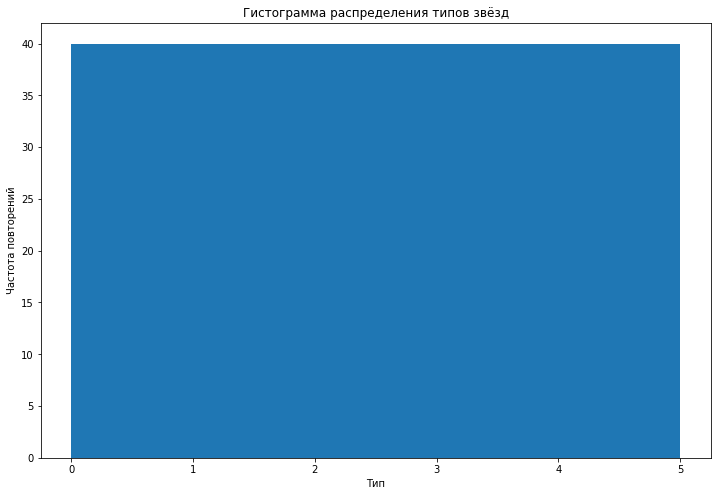

In [19]:
plt.figure(figsize=(12, 8))
plt.hist(data['type'], bins=6)
plt.gca().set(title='Гистограмма распределения типов звёзд', ylabel='Частота повторений', xlabel='Тип')
plt.show()

<b>Вывод</b>

Имеем 6 типов звезд с равным количеством звезд у каждого типа. Скорее всего, каждый отдельно взятый тип имеет в себе признаки, по которым и проводилось разделение на типы, поэтому нельзя назвать этот признак полностью неинформативным. Вероятно, данные были предоставлены намерено в одинаковом соотношении по типу, чтобы модель могла рассмотреть каждый тип в равной мере.

Признак не требует предобработки.

#### Признак color

In [20]:
col_desc('color')

Описание признака:


count     240
unique     19
top       Red
freq      112
Name: color, dtype: object

-----------------------------------------------------------
Уникальные значения:


Red                   112
Blue                   55
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              3
white                   3
Yellowish White         3
yellowish               2
Whitish                 2
Orange                  2
Pale yellow orange      1
Blue-White              1
Blue white              1
Yellowish               1
White-Yellow            1
Blue                    1
Orange-Red              1
Name: color, dtype: int64

-----------------------------------------------------------
Количество пропусков: 0
-----------------------------------------------------------


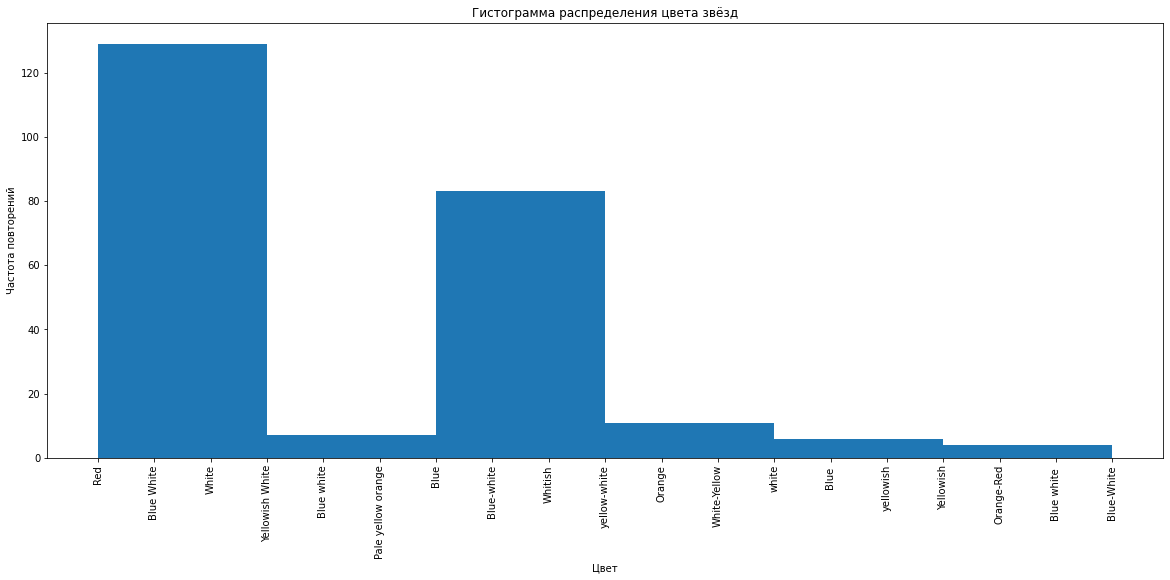

In [21]:
plt.figure(figsize=(20, 8))
plt.hist(data['color'], bins=6)
plt.gca().set(title='Гистограмма распределения цвета звёзд', ylabel='Частота повторений', xlabel='Цвет')
plt.xticks(rotation=90)
plt.show()

<b>Вывод</b>

Одни и те же цвета звёзд написано по разному, что необходимо исправить.

Признак требует предобработки.

In [22]:
data['color'] = data['color'].replace({'Blue White': 'Blue-white', 'Blue white':'Blue-white',
                                             'Blue white ':'Blue-white','Blue-White':'Blue-white',
                                             'Blue ':'Blue', 'white':'White', 'yellowish':'Yellowish',
                                             'yellow-white':'Yellow-white','White-Yellow':'Yellow-white',
                                             'Yellowish White':'Yellow-white','Pale yellow orange':'Pale-yellow-orange',
                                            'Whitish':'White'})

In [23]:
data['color'].value_counts()

Red                   112
Blue                   56
Blue-white             41
White                  12
Yellow-white           12
Yellowish               3
Orange                  2
Orange-Red              1
Pale-yellow-orange      1
Name: color, dtype: int64

In [24]:
data = data.query("color in ['Red', 'Blue', 'Blue-white', 'Yellow-white', 'White']")

In [25]:
data['color'].value_counts()

Red             112
Blue             56
Blue-white       41
White            12
Yellow-white     12
Name: color, dtype: int64

## Построение базовой нейронной сети

### Подготовка данных для нейронной сети

In [26]:
categorical = ['type', 'color']
numeric = ['luminosity', 'radius', 'abs_magnitude']

In [27]:
data_train, data_test = train_test_split(data, test_size=0.2, shuffle=True, random_state=123)

features_train = data_train.drop('temperature', axis=1)
target_train = data_train['temperature']
features_test = data_test.drop('temperature', axis=1)
target_test = data_test['temperature']

features_test.head()

col_transformer = ColumnTransformer(
    transformers=[('ss', StandardScaler(), numeric),
                  ('ohe', OneHotEncoder(), categorical)], 
    remainder='passthrough', n_jobs=-1,  sparse_threshold=0)

col_transformer.fit(features_train)

features_train = col_transformer.transform(features_train)
features_test = col_transformer.transform(features_test)

X_train = torch.FloatTensor(features_train)
Y_train = torch.FloatTensor(target_train.values)
X_test = torch.FloatTensor(features_test)
Y_test = torch.FloatTensor(target_test.values)


print('Размер X_train:', X_train.shape)
print('Размер X_test:', X_test.shape)
print('Размер Y_train:', Y_train.shape)
print('Размер Y_test:', Y_test.shape)

Размер X_train: torch.Size([186, 14])
Размер X_test: torch.Size([47, 14])
Размер Y_train: torch.Size([186])
Размер Y_test: torch.Size([47])


### Построение базовой модели

In [28]:
# Функция построения графика прогнозов и фактических значений

def graph_predict(test_pred,y):
        
    #test_pred = np.asarray(list(itertools.chain.from_iterable(x.data.numpy())))
    
    barWidth1 = 1
    barWidth2 = 0.5
    x_range = np.arange(len(y))
    
    plt.figure(figsize=(20, 8))
    
    plt.bar(x_range, y.data.numpy(), color='#aae6f2', width=barWidth1/2, edgecolor='#c3d5e8', label='Факт')
    plt.bar(x_range, test_pred, color='#ffc001', width=barWidth2/2, edgecolor='#c3d5e8', label='Прогноз')
    
    plt.axhline(y=0, color='gray')
    plt.legend(frameon=False, loc='lower center', bbox_to_anchor=(0.25, -0.3, 0.5, 0.5), prop={'size':25}, ncol = 2)
    plt.ylabel("Температура звезды")
    plt.xlabel("Номер звезды в таблице данных")
    
    plt.rcParams['figure.figsize'] = [25, 7]
    
    plt.rcParams.update({'font.size': 20})    
    plt.box(False)
    plt.savefig('plt', bbox_inches = "tight")
    plt.show()

In [29]:
# Создание класса нейронной сети

class Model_base(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, 
                 n_out_neurons, activation1=nn.ReLU(), activation2=nn.ReLU()):
        super(Model_base, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.act2 = activation1
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.act3 = activation2
        
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)
        self.act2 = nn.ReLU()
        


    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)

        x = self.fc3(x)
        x = self.act3(x)
        
        x = self.fc4(x)
        
        return x

In [30]:
class CustEarlyStopping():
    """
    Early stopping to stop the training when the loss does not improve after
    certain epochs.
    """
    def __init__(self, patience=5, min_delta=0):
        """
        :param patience: how many epochs to wait before stopping when loss is
               not improving
        :param min_delta: minimum difference between new loss and old loss for
               new loss to be considered as an improvement
        """
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
    def __call__(self, val_loss):
        if self.best_loss == None:
            self.best_loss = val_loss
        elif self.best_loss - val_loss > self.min_delta:
            self.best_loss = val_loss
            # reset counter if validation loss improves
            self.counter = 0
        elif self.best_loss - val_loss < self.min_delta:
            self.counter += 1
            print(f"INFO: Early stopping counter {self.counter} of {self.patience}")
            if self.counter >= self.patience:
                print('INFO: Early stopping')
                self.early_stop = True

In [31]:
# Написание функции обучения при заданных гиперпараметрах

def neural_network(n0:int, n1:int, n2:int, n3:int, nout:int, num_epochs:int, batch_size:int, x_tr:'tentor', y_tr:'tentor', epoch_msg=False)->'tuple':
    
    early_stopping = CustEarlyStopping(patience=25, min_delta=0.01)
    
    net = Model_base(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons)
    loss = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    num_batches = ceil(len(X_train)/batch_size)
    
    for epoch in range(num_epochs):
        net.train(True)                                                       #
        order = np.random.permutation(len(X_train))
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes]
            Y_batch = Y_train[batch_indexes]
            preds = net.forward(X_batch).flatten()                              #
            
            loss_value = loss(preds, Y_batch)
            
            loss_value.backward()

            optimizer.step()
            
        with torch.no_grad():
            net.train(False)
            for_RMSE_train = net.forward(X_train).flatten()
            RMSE_train = float(torch.sqrt(loss(for_RMSE_train, Y_train)))
            test_preds = net.forward(X_test).flatten()
            RMSE_test = float(torch.sqrt(loss(Y_test, test_preds)))
            early_stopping(RMSE_test)
            if early_stopping.early_stop:
                break
            
    best_RMSE = RMSE_train
    best_epoch = epoch
    best_model = net
            
    return (RMSE_train, RMSE_test, n1, n2, n3, best_epoch, batch_size, test_preds, best_model)

Проведём первый запуск построенной модели и проверим метрики. Гиперпараметры зададим произвольно.

In [32]:
%%time

n_in_neurons = X_train.size()[1]
n_hidden_neurons_1 = 60
n_hidden_neurons_2 = 50
n_hidden_neurons_3 = 30
n_out_neurons = 1
num_epochs = 501
batch_size = 12

b = neural_network(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, 
                   n_out_neurons, num_epochs, batch_size, X_train, Y_train, epoch_msg=True)
print('**********************************************************')
print('Конфигурация:')
print(b[-1])
print('**********************************************************')
print('RMSE Метрика на обучающей выборке:', float(b[0]))

print('RMSE Метрика на тестовой выборке:', float(b[1]))

INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 2 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 2 of 25
INFO: Early stopping counter 3 of 25
INFO: Early stopping counter 4 of 25
INFO: Early stopping counter 5 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 2 of 25
INFO: Early stopping counter 3 of 25
INFO: Early stopping counter 4 of 25
INFO: Early stopping counter 5 of 25
INFO: Early stopping counter 6 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 2 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 1 of 25
INFO: Early stopping counter 2 of 25
INFO: Early stopping counter 3 of 25
I

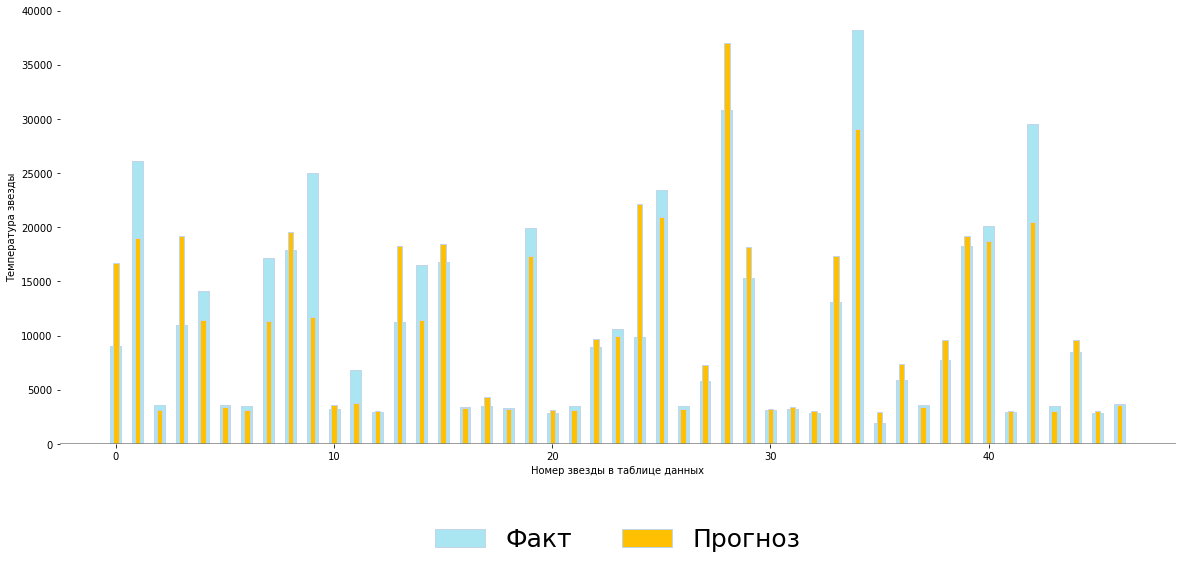

In [33]:
graph_predict(list(b[-2]), Y_test)

### Вывод

Обучена базовая модель, на выходе получили метрику RMSE равную 4334. Т.к. мы остановили обучение модели до сильного переобучения, то разница между метрикой на обучающей и тестовой выборках мала, а значит регуляризация весов посредством dropout несильно улучшит ситуацию, однако мы всё равно попробуем улучшить модель.

## Улучшение нейронной сети

Добавим регуляризацию весов с помощью dropout

In [34]:
class Model_improve(nn.Module):
    def __init__(self, n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons, 
                 dropout_1, dropout_2):
        super(Model_improve, self).__init__()

        self.fc1 = nn.Linear(n_in_neurons, n_hidden_neurons_1)
        self.dp1 = nn.Dropout(p=dropout_1)
        self.act1 = nn.ReLU()

        self.fc2 = nn.Linear(n_hidden_neurons_1, n_hidden_neurons_2)
        self.dp2 = nn.Dropout(p=dropout_2)
        self.act2 = nn.LeakyReLU(negative_slope=0.1)
        
        self.fc3 = nn.Linear(n_hidden_neurons_2, n_hidden_neurons_3)
        self.act3 = nn.ReLU()
        
        self.fc4 = nn.Linear(n_hidden_neurons_3, n_out_neurons)
        self.act4 = nn.ReLU()

    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)

        x = self.fc3(x)
        x = self.act3(x)
        
        x = self.fc4(x)
        x = self.act4(x)
        return x

In [35]:
def rmse(y_actual, y_predicted):
    rms = sqrt(mean_squared_error(y_actual, y_predicted))
    return rms

In [36]:
batch_size = 4
lr = 1e-3
patience = 25
rmse_scorer = make_scorer(rmse, greater_is_better=False)

skorch_regressor = NeuralNetRegressor(module=Model_improve, 
                                      device='cpu',  
                                      verbose=3,
                                      batch_size=batch_size,
                                      optimizer=torch.optim.Adam, 
                                      max_epochs=2500, 
                                      lr=lr,
                                      train_split=ValidSplit(cv=0.2),
                                      criterion =nn.MSELoss,
                                      callbacks=[
                                          ('val_rmse', EpochScoring(scoring=rmse_scorer, lower_is_better=True, name='RMSE')),
                                          ('estoper', EarlyStopping(monitor='RMSE', lower_is_better=True, patience=patience, threshold=0.01)),
                                      ],
                                     )

In [37]:
params = {'module__dropout_1': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'module__n_in_neurons': [n_in_neurons],
          'module__n_hidden_neurons_1': [n_hidden_neurons_1],
          'module__n_hidden_neurons_2': [n_hidden_neurons_2],
          'module__n_hidden_neurons_3': [n_hidden_neurons_3],
          'module__n_out_neurons': [n_out_neurons],
          'module__dropout_2': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
          'batch_size': range(2, 24)
         }

In [38]:
grid = RandomizedSearchCV(skorch_regressor, params, cv=3, scoring="neg_root_mean_squared_error", verbose=3) 
grid.fit(X_train, Y_train.reshape(-1,1))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
  epoch         RMSE      train_loss      valid_loss     dur
-------  -----------  --------------  --------------  ------
      1  -12974.5425  200877832.7273  168338752.0000  0.0322
      2  -12974.4981  200876342.9495  168337603.2000  0.0314
      3  -12974.4450  200874682.9899  168336222.4000  0.0124
      4  -12974.3803  200872112.3232  168334553.6000  0.0083
      5  -12974.2971  200870253.7374  168332377.6000  0.0769
      6  -12974.1873  200867797.3333  168329556.8000  0.0098
      7  -12974.0442  200862071.2727  168325824.0000  0.0096
      8  -12973.8488  200858401.2929  168320732.8000  0.0096
      9  -12973.5836  200851247.6768  168313881.6000  0.0087
     10  -12973.2309  200839461.9798  168304720.0000  0.0865
     11  -12972.7511  200825314.4242  168292278.4000  0.0107
     12  -12972.1190  200822130.9091  168275878.4000  0.0805
     13  -12971.3259  200805122.2626  168255300.8000  0.0093
     14  -12970.2583  20

RandomizedSearchCV(cv=3,
                   estimator=<class 'skorch.regressor.NeuralNetRegressor'>[uninitialized](
  module=<class '__main__.Model_improve'>,
),
                   param_distributions={'batch_size': range(2, 24),
                                        'module__dropout_1': [0.1, 0.2, 0.3,
                                                              0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9],
                                        'module__dropout_2': [0.1, 0.2, 0.3,
                                                              0.4, 0.5, 0.6,
                                                              0.7, 0.8, 0.9],
                                        'module__n_hidden_neurons_1': [60],
                                        'module__n_hidden_neurons_2': [50],
                                        'module__n_hidden_neurons_3': [30],
                                        'module__n_in_neurons': [14],
        

In [39]:
print(grid.best_score_, grid.best_params_)

-6367.0869140625 {'module__n_out_neurons': 1, 'module__n_in_neurons': 14, 'module__n_hidden_neurons_3': 30, 'module__n_hidden_neurons_2': 50, 'module__n_hidden_neurons_1': 60, 'module__dropout_2': 0.1, 'module__dropout_1': 0.3, 'batch_size': 5}


In [40]:
# Написание функции обучения при заданных гиперпараметрах

def neural_network_improve(n0:int, n1:int, n2:int, n3:int, nout:int, num_epochs:int, batch_size:int, dp1, dp2, x_tr:'tentor', y_tr:'tentor', epoch_msg=False)->'tuple':
    
    early_stopping = CustEarlyStopping(patience=50, min_delta=0.001)
    
    net = Model_improve(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, n_out_neurons, dp1, dp2)
    loss = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=1e-3)
    num_batches = ceil(len(X_train)/batch_size)
    
    for epoch in range(num_epochs):
        net.train(True)                                                       #
        order = np.random.permutation(len(X_train))
        for batch_idx in range(num_batches):
            start_index = batch_idx * batch_size
            optimizer.zero_grad()

            batch_indexes = order[start_index:start_index+batch_size]
            X_batch = X_train[batch_indexes]
            Y_batch = Y_train[batch_indexes]
            preds = net.forward(X_batch).flatten()                              #
            
            loss_value = loss(preds, Y_batch)
            
            loss_value.backward()

            optimizer.step()
            
        with torch.no_grad():
            net.train(False)
            for_RMSE_train = net.forward(X_train).flatten()
            RMSE_train = float(torch.sqrt(loss(for_RMSE_train, Y_train)))
            test_preds = net.forward(X_test).flatten()
            RMSE_test = float(torch.sqrt(loss(Y_test, test_preds)))
            early_stopping(RMSE_test)
            if early_stopping.early_stop:
                break
            
#        if epoch % 100 == 0:
#            optimizer = torch.optim.Adam(net.parameters(), lr=lr*0.9)
            
    best_RMSE = RMSE_train
    best_epoch = epoch
    best_model = net
            
    return (RMSE_train, RMSE_test, n1, n2, n3, best_epoch, batch_size, test_preds, best_model)

In [41]:
%%time

par = list(grid.best_params_.values())

n_hidden_neurons_1 = par[4]
n_hidden_neurons_2 = par[3]
n_hidden_neurons_3 = par[2]

num_epochs = 2501
batch_size = par[7]
dp1 = par[6]
dp2 = par[5]

a = neural_network_improve(n_in_neurons, n_hidden_neurons_1, n_hidden_neurons_2, n_hidden_neurons_3, 
                           n_out_neurons, num_epochs, batch_size, dp1, dp2, X_train, Y_train, epoch_msg=True)
print('**********************************************************')
print('Конфигурация:')
print(a[-1])
print('**********************************************************')
print('RMSE Метрика на обучающей выборке:', float(a[0]))

print('RMSE Метрика на тестовой выборке:', float(a[1]))

INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 3 of 50
INFO: Early stopping counter 4 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 3 of 50
INFO: Early stopping counter 4 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 1 of 50
INFO: Early stopping counter 2 of 50
I

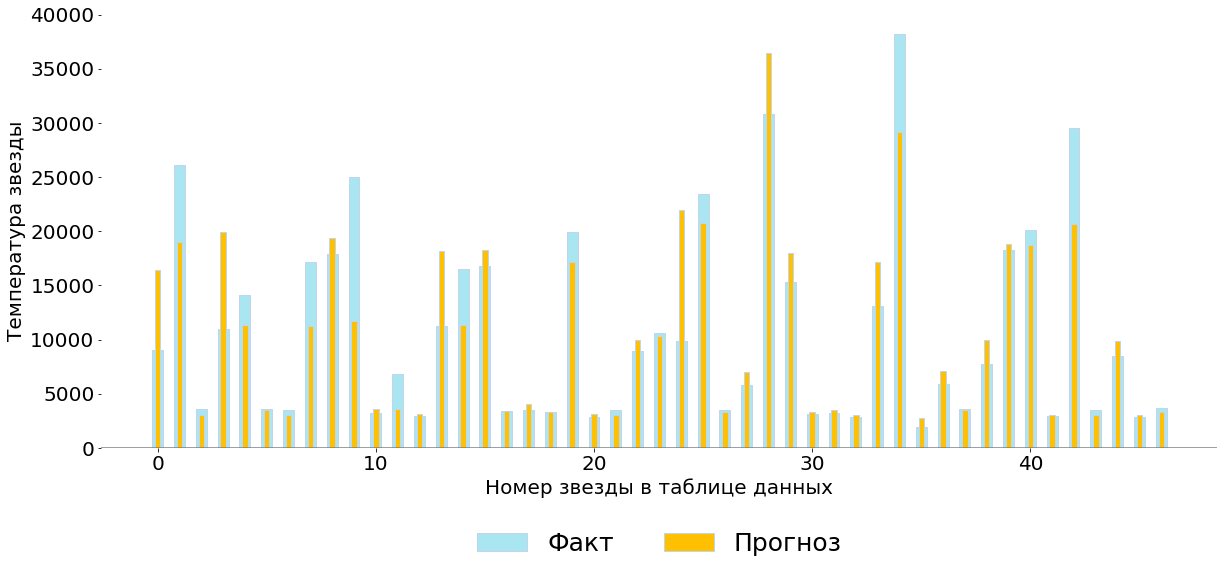

In [42]:
graph_predict(a[-2], Y_test)

## Выводы

Рассмотрены разные модели нейронных сетей: модель с двумя скрытыми слоями без dropout, модель с _ скрытыми слоями без dropout, модель модель с двумя скрытыми слоями с dropout без подбора параметров, модель модель с двумя скрытыми слоями с dropout с подбором параметров. Наилучшим образом себя показала следующая модель: .

Сравним две модели - выбранная базовая и её модификация:

**********************************************************
Конфигурация базовой модели:
Model_base(
  (fc1): Linear(in_features=14, out_features=60, bias=True)
  (act1): ReLU()
  (fc2): Linear(in_features=60, out_features=50, bias=True)
  (act2): ReLU()
  (fc3): Linear(in_features=50, out_features=30, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=30, out_features=1, bias=True)
)
**********************************************************
Результаты:
RMSE Метрика на обучающей выборке: 4231.380859375
RMSE Метрика на тестовой выборке: 4357.94384765625


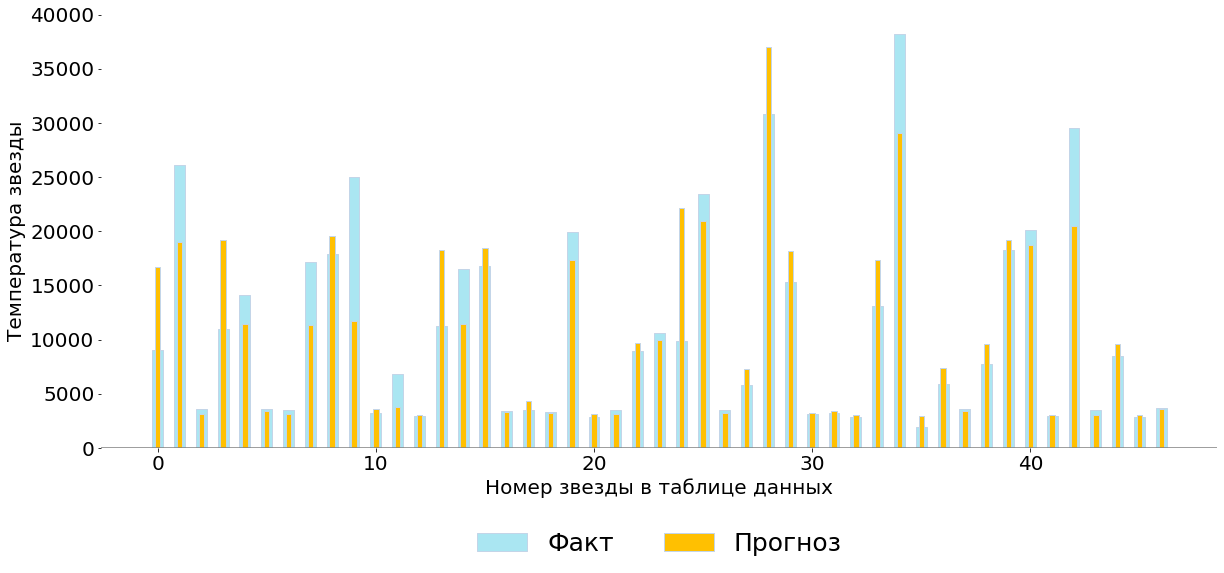

In [43]:
print('**********************************************************')
print('Конфигурация базовой модели:')
print(b[-1])
print('**********************************************************')
print('Результаты:')
print('RMSE Метрика на обучающей выборке:', float(b[0]))
print('RMSE Метрика на тестовой выборке:', float(b[1]))

graph_predict(b[-2], Y_test)

**********************************************************
Конфигурация модифицированной модели:
Model_improve(
  (fc1): Linear(in_features=14, out_features=60, bias=True)
  (dp1): Dropout(p=0.3, inplace=False)
  (act1): ReLU()
  (fc2): Linear(in_features=60, out_features=50, bias=True)
  (dp2): Dropout(p=0.1, inplace=False)
  (act2): LeakyReLU(negative_slope=0.1)
  (fc3): Linear(in_features=50, out_features=30, bias=True)
  (act3): ReLU()
  (fc4): Linear(in_features=30, out_features=1, bias=True)
  (act4): ReLU()
)
**********************************************************
Результаты:
RMSE Метрика на обучающей выборке: 4201.36767578125
RMSE Метрика на тестовой выборке: 4345.62109375


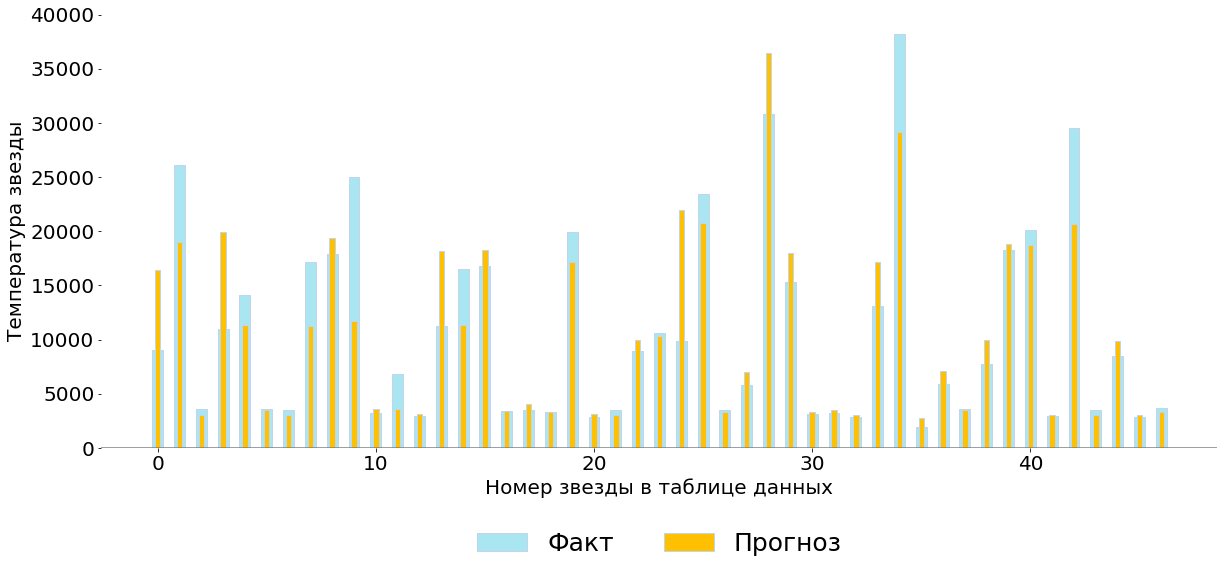

In [44]:
print('**********************************************************')
print('Конфигурация модифицированной модели:')
print(a[-1])
print('**********************************************************')
print('Результаты:')
print('RMSE Метрика на обучающей выборке:', float(a[0]))
print('RMSE Метрика на тестовой выборке:', float(a[1]))

graph_predict(a[-2], Y_test)

<b>Вывод</b>

Обучена базовая модель с двумя скрытыми слоями, на выходе она выдаёт метрику равную 4334, что подходит под условие <4500. Также обучена модифицированная модель, для которой были подобраны параметры размера батча и dropout, на выходе она выдаёт метрику равную 4421, т.е. модель не стала предсказывать намного лучше с добавлением в неё слоёв dropout, потому что у базовой модели не было заметно переобучения. Обе модели дают необходимое значение метрики.